In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('30_stocks_weekly_features.csv')
data

,Unnamed: 0,name,stock,start_time,end_time,days,成交量均值,成交金额均值,上周涨跌幅,涨跌幅均值,股价波动程度,开收盘价方差,未来一周的收益率
0,0,The AES Corporation,AES,2017-01-09 00:00:00.000000000,2017-01-15 23:59:59.999999999,5,-0.398383,-1.145283,0.226258,0.287462,-0.055444,-0.405057,-0.679557
1,1,The AES Corporation,AES,2017-01-16 00:00:00.000000000,2017-01-22 23:59:59.999999999,4,-0.520891,-1.189481,0.298712,-1.456626,0.383722,-0.418317,-0.106444
2,2,The AES Corporation,AES,2017-01-23 00:00:00.000000000,2017-01-29 23:59:59.999999999,5,1.457093,-0.358304,-1.237836,0.276422,-0.625553,-0.491673,0.092017
3,3,The AES Corporation,AES,2017-01-30 00:00:00.000000000,2017-02-05 23:59:59.999999999,5,-0.307792,-1.119155,0.287240,0.231663,-0.586995,-0.491420,0.386239
4,4,The AES Corporation,AES,2017-02-06 00:00:00.000000000,2017-02-12 23:59:59.999999999,5,-0.803225,-1.326657,0.240727,0.587547,-0.345918,-0.472615,-0.376327
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,293,Southwest Airlines Company,LUV,2022-08-22 00:00:00.000000000,2022-08-28 23:59:59.999999999,5,-0.434759,-0.870276,-1.068083,0.023026,-0.405714,-0.463917,-0.400224
8936,294,Southwest Airlines Company,LUV,2022-08-29 00:00:00.000000000,2022-09-04 23:59:59.999999999,5,-0.562784,-1.041082,0.023898,-0.425020,-0.586651,-0.479894,0.856012
8937,295,Southwest Airlines Company,LUV,2022-09-05 00:00:00.000000000,2022-09-11 23:59:59.999999999,4,-0.345209,-0.764908,-0.451713,1.227379,-0.005882,-0.410905,-1.817783
8938,296,Southwest Airlines Company,LUV,2022-09-12 00:00:00.000000000,2022-09-18 23:59:59.999999999,5,0.064190,-0.324167,1.039057,-2.343049,1.620589,0.238612,-1.477891


In [3]:
#仅处理第一周的数据
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)
data = data[data['start_time']==data['start_time'][0]]
companies = data.iloc[0:,1:3].reset_index()
data=data.iloc[0:,6:]

In [4]:
#bartlett检验  p_value->0 才能主成分分析
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
 
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print('chi_square_value:',chi_square_value,'\n p_value:',p_value)

chi_square_value: 101.58616045107574 
 p_value: 1.5111138919197878e-12


In [5]:
#主成分分析
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(data)
k1_spss = pca.components_ / np.sqrt(pca.explained_variance_.reshape(pca.n_components_, 1))
print('贡献方差，即特征根:', pca.explained_variance_) # The amount of variance explained by each of the selected components.
print('方差贡献率:', pca.explained_variance_ratio_) # Percentage of variance explained by each of the selected components.
print('成分得分系数矩阵:', k1_spss)    #最后一列是每支股票得分

贡献方差，即特征根: [0.82841735 0.35343766 0.23350249 0.10409803 0.06652693 0.05885821]
方差贡献率: [0.5005956  0.21357512 0.14110076 0.0629043  0.04020086 0.03556681]
成分得分系数矩阵: [[ 0.69983893  0.74641367  0.05407828  0.06352782  0.34489028  0.14463002
  -0.11569672]
 [-0.26572258  0.1802896   0.7605704  -1.22319737  0.27538972  0.44383146
   0.61541488]
 [-0.86783876  0.35624059 -1.38375451 -0.06796015  0.9422572   0.76132883
   0.1252709 ]
 [ 0.24263428 -1.55676166  1.03298479  0.61165849  2.26872027  0.24284941
  -0.69043456]
 [-0.86976406  0.84324889  0.95143014  2.17862614  0.53436903 -0.56831307
   2.70255196]
 [-2.274111    1.64285324  1.68956733  0.78195272 -0.36525366  0.60528589
  -2.27014692]]


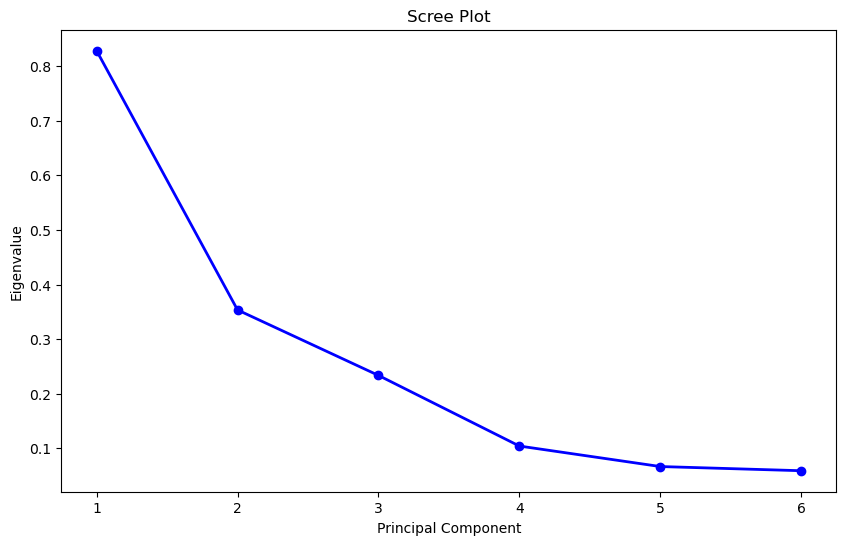

In [6]:
figure=plt.figure(figsize=(10,6))
sing_vals=np.arange(len(pca.explained_variance_)) + 1
plt.plot(sing_vals, pca.explained_variance_, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue') 
plt.show() 

In [7]:
def score(pca,data):
    pca.components_ / np.sqrt(pca.explained_variance_.reshape(pca.n_components_, 1))
    X_score = pca.transform(data)
    #print('因子得分:', X_score)
    # 因子得分归一化，使其服从正态分布
    scaler2 = StandardScaler().fit(X_score)
    columns = []
    for i in range(X_score.shape[1]):
        columns.append('FAC'+str(i+1))
    X_score_scaler = pd.DataFrame(scaler2.transform(X_score), columns=columns)
    # 正负号转化
    k_sign = np.sign(k1_spss.sum(axis=1))
    # 取正负号
    X_score_scaler_sign = X_score_scaler
    # 综合得分
    rate = pca.explained_variance_ratio_
    X_score_scaler_sign['FAC_score'] = np.sum(X_score_scaler_sign * rate, axis=1)
    X_score_scaler_sign.sort_values(by=['FAC_score'], ascending=False, inplace=True)
    return X_score_scaler_sign
X_score_scaler_sign = score(pca,data)
print(X_score_scaler_sign)
#print(X_score_scaler_sign[X_score_scaler_sign["FAC_score"]>0])

        FAC1      FAC2      FAC3      FAC4      FAC5      FAC6  FAC_score
21  1.698653  2.410068  3.809278 -0.475903 -1.061562  0.421176   1.844929
24  2.933781 -1.064205 -0.270701 -0.775427  0.253181  0.159413   1.170224
19  1.749667 -0.751474 -0.347747  1.195412  1.345557 -0.173600   0.789427
12  0.703656  1.912765 -1.826427  0.935315 -0.202620 -1.409040   0.503631
17  0.681950  1.245584 -0.416002  0.102540 -0.521324 -1.834211   0.468964
15  0.167279  1.360201 -0.138885  1.200424 -0.881992 -0.070233   0.392204
22  0.101928  1.291168 -0.453483  0.457253  0.666228  1.247513   0.362715
3   0.915047 -1.265581 -0.122907 -0.184386 -0.717941  1.095477   0.168932
5   0.601750 -0.927909  0.044246  0.401736  0.866235 -0.051431   0.167563
6   1.152422 -0.708933 -0.889646 -2.106489 -0.543401  0.447392   0.161517
18 -0.271159  0.667225  0.100591 -0.241787  0.827843  0.568772   0.059255
1   0.385675 -0.877413  0.292961  0.683703  0.205628 -1.629828   0.040317
29  0.134109 -0.615045  0.623008 -0.47

# 第一个股票交易策略：
基于上述FAC_score得分排名，选取10支得分最高的股票，每支占比10%，每周一调仓一次。
### 优点：
简单好上手,quick start
### 缺点：
1. 只用了过去一周的数据来评分
2. 调仓时间固定
3. 持仓比例固定

# 改进1：增大观测周期
这里仅仅考虑多因子模型的观测周期，深度学习类似

In [8]:
# 取第k周数据，本周和前2周数据合成1周，取算数平均
k=3

#三周数据整合处理
data = pd.read_csv('30_stocks_weekly_features.csv')
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)

data0 = data[data['start_time']==data['start_time'][k-3]]
data1 = data[data['start_time']==data['start_time'][k-2]]
data2 = data[data['start_time']==data['start_time'][k-1]]
data1.index = data0.index
data2.index = data0.index

companies = data1.iloc[0:,1:3]
companies = companies.reset_index().drop(columns = ['index'])
data = data0 + data1 + data2
data=data.iloc[0:,6:]
data = data/3
data = data.reset_index().drop(columns = ['index'])
data

,Average Volume,Average Turnover,Gain/Loss Last Week,Average Gain/Loss,Volatility,Price Variance,Yield Next week
0,0.179273,-0.897690,-0.237622,-0.297581,-0.099091,-0.438349,-0.231328
1,-0.310364,-1.158714,0.130877,0.181439,-0.583200,-0.501438,-0.184776
2,-0.223001,-0.386063,0.167727,-0.403174,-0.276899,-0.298047,-0.430066
3,0.389426,0.065255,0.312392,0.451272,-0.585103,-0.559624,-0.122367
4,-0.204355,-0.989489,-0.208907,-0.330935,-0.641372,-0.522403,-0.110193
5,0.176939,-0.292404,0.268069,0.228525,-0.677272,-0.495570,-0.152210
6,0.004206,-0.293532,0.003083,0.076611,-0.655086,-0.512688,0.113819
7,-0.466809,-0.987910,0.209446,-0.216759,-0.664622,-0.334385,-0.389132
8,-1.135030,-1.249777,0.136703,0.069215,-0.880267,-0.479657,-0.034274
9,-0.454554,-0.956650,-0.064681,0.606401,-0.617979,-0.707009,0.258278


In [9]:
#从三周数据获取得分
pca = PCA(n_components=6)
pca.fit(data)
X_score_scaler_sign = score(pca,data)
X_score_scaler_sign

,FAC1,FAC2,FAC3,FAC4,FAC5,FAC6,FAC_score
29,1.454994,1.327581,1.285934,2.499977,1.460149,0.365268,1.428873
21,1.029274,-0.870341,3.445652,-0.416615,-0.237011,1.772575,0.853670
3,1.815330,0.911708,-1.061010,-0.635152,-0.728357,0.029211,0.782252
24,1.881082,0.067614,-0.720197,-0.110267,-0.907850,0.145466,0.737157
10,1.699606,-0.318044,-0.758057,0.086163,-0.124953,0.833271,0.662102
13,0.213987,1.377957,1.559438,-1.244013,-0.144340,-1.098615,0.450791
19,0.944966,0.440115,-0.608618,0.826132,-0.435048,-0.778731,0.447961
5,1.049485,0.442488,-1.013474,-0.601015,-0.768116,-0.244410,0.327407
6,0.811721,0.092242,-0.075263,-1.241088,-0.132762,0.517708,0.307306
9,-0.421977,1.686019,-0.124824,-0.490702,0.910299,1.908794,0.189731


In [10]:
#Top 10
result = pd.concat([X_score_scaler_sign, companies], axis=1).reindex(X_score_scaler_sign.index)
result['stock'][:10]

29     LUV
21    VTRS
3     ZION
24     JCI
10     HIG
13      MO
19      GM
5      KMX
6      DVA
9      ADI
Name: stock, dtype: object

# 改进2 ：调整持仓比例
上述的分数计算是一种根据方差的贡献率的粗略打分。但可以本质上我们只需要量化风险&收益：收益、风险因子

我们想通过更细致的操作来实现极致的收益——风险平衡点，在规定的风险范围内找到最大收益持仓比。本质上是一个线性规划的问题，这里我们采用一个比较原始的求解方法：遍历

In [11]:
# 取第k周数据，本周和前2周数据合成1周，取算数平均
k=3

#三周数据整合处理
data = pd.read_csv('30_stocks_weekly_features.csv')
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)

data0 = data[data['start_time']==data['start_time'][k-3]]
data1 = data[data['start_time']==data['start_time'][k-2]]
data2 = data[data['start_time']==data['start_time'][k-1]]
data1.index = data0.index
data2.index = data0.index

data = data0 + data1 + data2
companies = data.iloc[0:,1:3].reset_index().drop(columns = 'index')
data=data.iloc[0:,6:]
data = data/3
data = data.reset_index().drop(columns = 'index')
data

,Average Volume,Average Turnover,Gain/Loss Last Week,Average Gain/Loss,Volatility,Price Variance,Yield Next week
0,0.179273,-0.897690,-0.237622,-0.297581,-0.099091,-0.438349,-0.231328
1,-0.310364,-1.158714,0.130877,0.181439,-0.583200,-0.501438,-0.184776
2,-0.223001,-0.386063,0.167727,-0.403174,-0.276899,-0.298047,-0.430066
3,0.389426,0.065255,0.312392,0.451272,-0.585103,-0.559624,-0.122367
4,-0.204355,-0.989489,-0.208907,-0.330935,-0.641372,-0.522403,-0.110193
5,0.176939,-0.292404,0.268069,0.228525,-0.677272,-0.495570,-0.152210
6,0.004206,-0.293532,0.003083,0.076611,-0.655086,-0.512688,0.113819
7,-0.466809,-0.987910,0.209446,-0.216759,-0.664622,-0.334385,-0.389132
8,-1.135030,-1.249777,0.136703,0.069215,-0.880267,-0.479657,-0.034274
9,-0.454554,-0.956650,-0.064681,0.606401,-0.617979,-0.707009,0.258278


In [12]:
#收益和风险因子的计算(仍有改进空间)
data['earn_ai'] =  (data['Gain/Loss Last Week']+data['Average Gain/Loss']+data['Yield Next week'])/3
data['risk_ei'] =  (data['Volatility']+data['Price Variance'])/2
data

,Average Volume,Average Turnover,Gain/Loss Last Week,Average Gain/Loss,Volatility,Price Variance,Yield Next week,earn_ai,risk_ei
0,0.179273,-0.897690,-0.237622,-0.297581,-0.099091,-0.438349,-0.231328,-0.255510,-0.268720
1,-0.310364,-1.158714,0.130877,0.181439,-0.583200,-0.501438,-0.184776,0.042513,-0.542319
2,-0.223001,-0.386063,0.167727,-0.403174,-0.276899,-0.298047,-0.430066,-0.221838,-0.287473
3,0.389426,0.065255,0.312392,0.451272,-0.585103,-0.559624,-0.122367,0.213765,-0.572364
4,-0.204355,-0.989489,-0.208907,-0.330935,-0.641372,-0.522403,-0.110193,-0.216678,-0.581887
5,0.176939,-0.292404,0.268069,0.228525,-0.677272,-0.495570,-0.152210,0.114795,-0.586421
6,0.004206,-0.293532,0.003083,0.076611,-0.655086,-0.512688,0.113819,0.064504,-0.583887
7,-0.466809,-0.987910,0.209446,-0.216759,-0.664622,-0.334385,-0.389132,-0.132148,-0.499504
8,-1.135030,-1.249777,0.136703,0.069215,-0.880267,-0.479657,-0.034274,0.057215,-0.679962
9,-0.454554,-0.956650,-0.064681,0.606401,-0.617979,-0.707009,0.258278,0.266666,-0.662494


In [13]:
#(根据约束条件求解最优权重，待补充)
def linear_solver(u_i, data):
    C = []
    bounds = []
    for j in range(stock_count):
        C.append((u_i - 1) * data['earn_ai'][j])
        bounds.append((0, None))
    C.append(u_i)
    bounds.append((None, None))

    A_ub = np.zeros((stock_count + 1,stock_count + 1))
    B_ub = np.zeros(stock_count + 1)
    B_ub[stock_count] = 1
    for k in range(stock_count):
        A_ub[k][k] = data['risk_ei'][k]
        A_ub[k][stock_count] = -1
    for k in range(stock_count):
        A_ub[stock_count][k] = 1
    resa = op.linprog(C, A_ub, B_ub, bounds=bounds)
    return resa

In [14]:
def combine(k, data):
    #k = 3
    data0 = data[data['start_time']==data['start_time'][k-3]]
    data1 = data[data['start_time']==data['start_time'][k-2]]
    data2 = data[data['start_time']==data['start_time'][k-1]]
    data1.index = data0.index
    data2.index = data0.index
    data_composite = data0 + data1 + data2
    data_composite = data_composite.iloc[0:,6:]
    data_composite = data_composite/3
    data_composite = data_composite.reset_index().drop(columns = 'index')
    data_composite['earn_ai'] =  (data_composite['Gain/Loss Last Week']+data_composite['Average Gain/Loss']+data_composite['Yield Next week'])/3
    data_composite['risk_ei'] =  (data_composite['Volatility']+data_composite['Price Variance'])/2
    return data_composite

In [15]:
def combine_sp(k, data):
    #k = 3
    data_composite = data[data['start_time']==data['start_time'][k]]
    data_composite = data_composite.iloc[0:,6:]
    data_composite = data_composite.reset_index().drop(columns = 'index')
    data_composite['earn_ai'] =  (data_composite['Gain/Loss Last Week']+data_composite['Average Gain/Loss']+data_composite['Yield Next week'])/3
    data_composite['risk_ei'] =  (data_composite['Volatility']+data_composite['Price Variance'])/2
    return data_composite

In [16]:
sp = pd.read_csv('GSPC_week_features_rescaled.csv')    
sp.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)
sp_composite = combine_sp(2, sp)
sp_composite 

,Average Volume,Average Turnover,Gain/Loss Last Week,Average Gain/Loss,Volatility,Price Variance,Yield Next week,earn_ai,risk_ei
0,-0.604414,-1.131642,-0.042372,0.467698,-0.32602,-0.456359,-0.026201,0.133042,-0.39119


In [17]:
from scipy import optimize as op
result = {}
week_cnt = 0
week_max = 298
stock_count = 30
u = [0.9, 0.5, 0.1]
for u_i in u:
    result[u_i] = []
result['sp'] = []    

sp = pd.read_csv('GSPC_week_features_rescaled.csv')    
sp.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)

data = pd.read_csv('30_stocks_weekly_features.csv')
data.rename(columns={'成交量均值':'Average Volume', '成交金额均值':'Average Turnover', '上周涨跌幅':'Gain/Loss Last Week','涨跌幅均值':'Average Gain/Loss','股价波动程度':'Volatility','开收盘价方差':'Price Variance','未来一周的收益率':'Yield Next week'}, inplace = True)

for k in range(3, week_max):
    data_composite = combine(k, data)
    sp_composite = combine_sp(k-1, sp)
    
    for u_i in u:
        resa = linear_solver(u_i, data_composite)
        price = 0
    
        for i in range(30):
            price +=  data_composite['earn_ai'][i] * resa.x[i]
        result[u_i].append(price)
    result['sp'].append(sp_composite['Average Gain/Loss'])

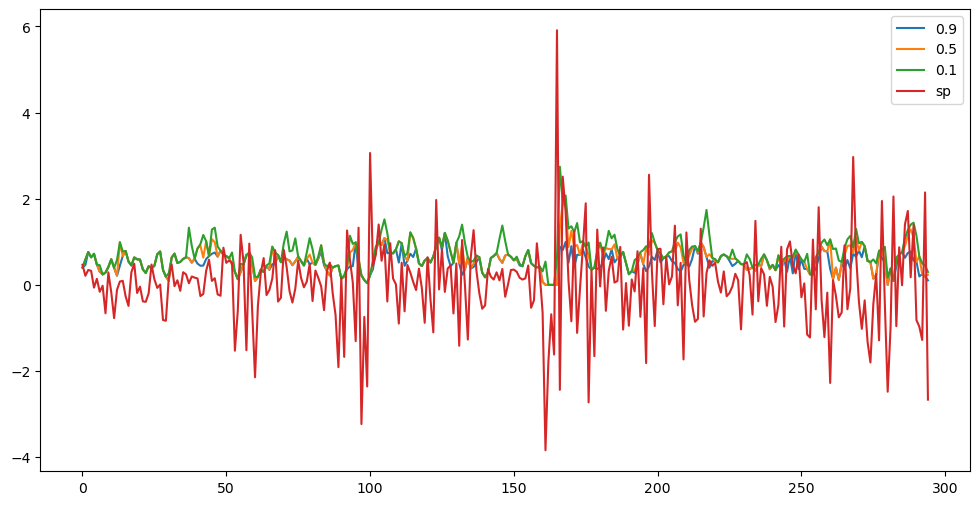

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
for key in result.keys():
    plt.plot(result[key], label = key)
    plt.legend(loc='upper right')

# 改进3：调整持仓时间(当前数据的基础粒度是周，不太容易做)
相比于每周调整策略，我们希望自己的策略在时间粒度上能够更加灵活。如果不考虑手续费的影响，和改进2的区别在于：之前只需要关心截止下周收益率的变化情况，无论当前股票收益如何，下周重新调整股票到最有潜力的分布。可以再加上收益效率的考量，即用最少的天数赚最多的钱。